In [6]:
#### this code caluclates a standardised elevation-area curve from the TanDEM-X 
## code to extract the original curve as a geojson file: 
#https://code.earthengine.google.com/02aa69e200de4fca29eecd9ca5dceaca

In [19]:
import json 
import csv
import pandas as pd 
from pandas.io.json import json_normalize
import json
from datetime import datetime
import re
import numpy as np
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from functools import reduce

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


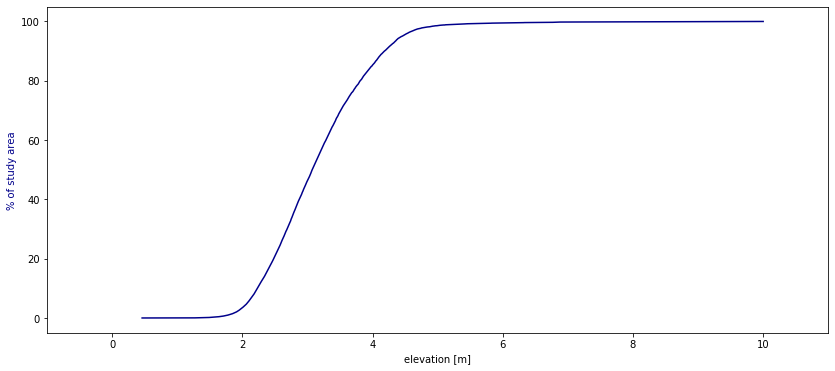

In [20]:

## Import the Prek Area Curve: 

with open('sac_ca.json') as f:
    data = json.load(f)

df_PAC = json_normalize(data['features']).drop(['type', 'geometry', 'id'], axis=1) # gets rid of columns that aren't needed

df_PAC.tail()

df_PAC.columns = ['Elev'] # renames colums that are left
df_PAC['Elev'] = df_PAC['Elev'].round(2)
df_PAC['copyElev'] = df_PAC['Elev']
df_PAC = df_PAC.set_index('copyElev')# uses the Openfluid ID as an indes
df_PAC = df_PAC.sort_index() # sorts ascending
df_PAC = df_PAC.reset_index() # resets to 0
df_PAC.index += 1 # resets index to start as 1

df_PAC['pixelnumber'] = df_PAC.index # copy index to column (how many pixels smaller than this)
    
df_PAC['area'] = (df_PAC['pixelnumber']/len(df_PAC))#*44141594 # calculates percentage of SU flooded at this height 

PAC = df_PAC.drop(['pixelnumber', 'copyElev'], axis=1) # drops unnecessary column 

### prePACre alos for comPACrison and visualisation: 

# round values to cm 

PAC = PAC.groupby(['Elev']).sum()

PAC.columns = ['area']

PAC['cumarea'] = np.cumsum(PAC['area'])


max_value = PAC['cumarea'].max()

PAC['cumarea_percent'] = PAC['cumarea']/max_value*100


### standardise to steps

all_wl = pd.read_csv('empty_wl.csv', sep=';', decimal=',')

all_wl = all_wl.set_index('wl_KK')

## merge and interpolate missing dates 
inundation_link = pd.merge(all_wl, PAC, how='outer', left_index=True, right_index=True)
inundation_link = inundation_link.drop(columns = ['Index'])
inundation_link = inundation_link.fillna(inundation_link.interpolate(method='linear')).rolling(center=False, window=3, min_periods=1).mean()

inundation_link.to_csv('inundation_link_tandem_ca.csv')

inundation_link.head()

# Initialise the figure and axes.

fig, ax1 = plt.subplots(1, figsize=(14, 6))

# Set the title for the figure
#fig.suptitle('Elevation-Area-Curve TanDEM-X: PCW 1 km Radius', fontsize=15)


# define axes 
y1 = PAC['cumarea_percent']

#x = flood_daily.index
x = PAC.index

ax1.plot(x, y1, color="darkblue", label="flood extents")

#plt.legend(loc="upper left", title="Legend ", frameon=False)
#ax2.legend(loc=0)
#ax1.legend(loc=1)

#plt.xticks(rotation = 45)

ax1.set_xlabel('elevation [m]')
ax1.set_ylabel('% of study area', color='darkblue')
ax1.set_xlim([-1,11])


plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0 )

fig.savefig('Tan_DEM_PAC', dpi=300)
fig.savefig('TanDEM_Elev_Circular.png', dpi=300)


plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


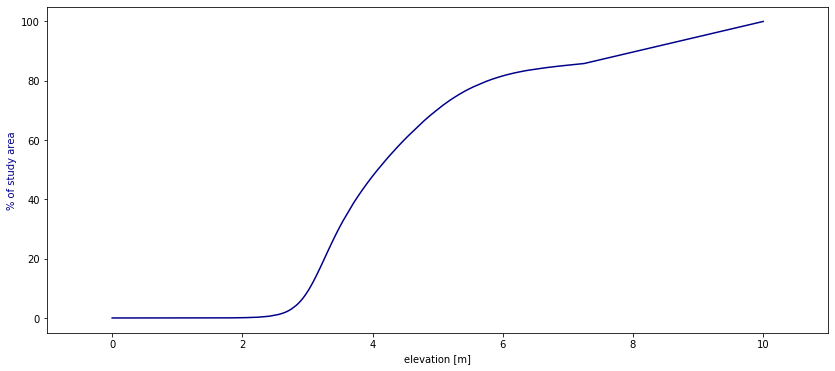

In [21]:
## Import the Zone2C Curve

with open('sac_2C.json') as f:
    data = json.load(f)

df_2C = json_normalize(data['features']).drop(['type', 'geometry', 'id'], axis=1) # gets rid of columns that aren't needed

df_2C.head()

df_2C.columns = ['Elev'] # renames colums that are left
df_2C['Elev'] = df_2C['Elev']#+10.8.round(2)
df_2C['copyElev'] = df_2C['Elev']
df_2C = df_2C.set_index('copyElev')# uses the Openfluid ID as an indes
df_2C = df_2C.sort_index() # sorts ascending
df_2C = df_2C.reset_index() # resets to 0
df_2C.index += 1 # resets index to start as 1

df_2C['pixelnumber'] = df_2C.index # copy index to column (how many pixels smaller than this)
    
df_2C['area'] = (df_2C['pixelnumber']/len(df_2C))#*44141594 # calculates percentage of SU flooded at this height 

df_2C.head()

Z2C = df_2C.drop(['pixelnumber', 'copyElev'], axis=1) # drops unnecessary column 

### prepare alos for comparison and visualisation: 

# round values to cm 

Z2C = Z2C.groupby(['Elev']).sum()

Z2C.columns = ['area']

Z2C['cumarea'] = np.cumsum(Z2C['area'])

max_value = Z2C['cumarea'].max()

Z2C['cumarea_percent'] = Z2C['cumarea']/max_value*100

Z2C.head()


### standardise to steps

all_wl = pd.read_csv('empty_wl.csv', sep=';', decimal=',')

all_wl = all_wl.set_index('wl_KK')

## merge and interpolate missing dates 
inundation_link = pd.merge(all_wl, Z2C, how='outer', left_index=True, right_index=True)
inundation_link = inundation_link.drop(columns = ['Index'])
inundation_link = inundation_link.fillna(inundation_link.interpolate(method='linear')).rolling(center=False, window=3, min_periods=1).mean()

inundation_link.to_csv('inundation_link_tandem_Z2C.csv')


inundation_link.head()

# Initialise the figure and axes.

fig, ax1 = plt.subplots(1, figsize=(14, 6))

# Set the title for the figure
#fig.suptitle('Elevation-Area-Curve TanDEM-X: Zone 2C', fontsize=15)


# define axes 
y1 = Z2C['cumarea_percent']


#x = flood_daily.index
x = Z2C.index

ax1.plot(x, y1, color="darkblue", label="flood extents")

#plt.legend(loc="upper left", title="Legend ", frameon=False)
#ax2.legend(loc=0)
#ax1.legend(loc=1)

#plt.xticks(rotation = 45)

ax1.set_xlabel('elevation [m]')
ax1.set_ylabel('% of study area', color='darkblue')
ax1.set_xlim([-1,11])


plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0 )

fig.savefig('Tan_DEM_Z2C', dpi=300)
fig.savefig('TanDEM_Elev_Z2C.png', dpi=300)


plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


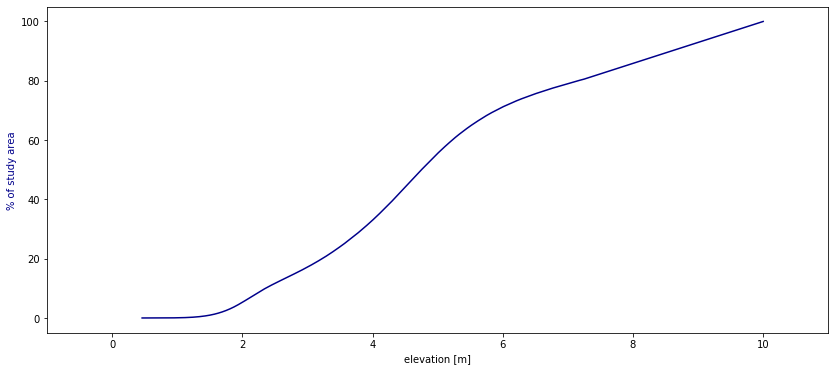

In [22]:
## Import the ZonePA Curve

with open('sac_PA.json') as f:
    data = json.load(f)

df_PA = json_normalize(data['features']).drop(['type', 'geometry', 'id'], axis=1) # gets rid of columns that aren't needed

df_PA.head()

df_PA.columns = ['Elev'] # renames colums that are left
df_PA['Elev'] = df_PA['Elev']#+10.8.round(2)
df_PA['copyElev'] = df_PA['Elev']
df_PA = df_PA.set_index('copyElev')# uses the Openfluid ID as an indes
df_PA = df_PA.sort_index() # sorts ascending
df_PA = df_PA.reset_index() # resets to 0
df_PA.index += 1 # resets index to start as 1

df_PA['pixelnumber'] = df_PA.index # copy index to column (how many pixels smaller than this)
    
df_PA['area'] = (df_PA['pixelnumber']/len(df_PA))#*44141594 # calculates percentage of SU flooded at this height 

df_PA.head()

PA = df_PA.drop(['pixelnumber', 'copyElev'], axis=1) # drops unnecessary column 

### prepare alos for comparison and visualisation: 

# round values to cm 

PA = PA.groupby(['Elev']).sum()

PA.columns = ['area']

PA['cumarea'] = np.cumsum(PA['area'])

max_value = PA['cumarea'].max()

PA['cumarea_percent'] = PA['cumarea']/max_value*100

PA.head()


### standardise to steps

all_wl = pd.read_csv('empty_wl.csv', sep=';', decimal=',')

all_wl = all_wl.set_index('wl_KK')

## merge and interpolate missing dates 
inundation_link = pd.merge(all_wl, PA, how='outer', left_index=True, right_index=True)
inundation_link = inundation_link.drop(columns = ['Index'])
inundation_link = inundation_link.fillna(inundation_link.interpolate(method='linear')).rolling(center=False, window=3, min_periods=1).mean()

inundation_link.to_csv('inundation_link_tandem_PA.csv')


inundation_link.head()

# Initialise the figure and axes.

fig, ax1 = plt.subplots(1, figsize=(14, 6))

# Set the title for the figure
#fig.suptitle('Elevation-Area-Curve TanDEM-X: Zone PA', fontsize=15)


# define axes 
y1 = PA['cumarea_percent']


#x = flood_daily.index
x = PA.index

ax1.plot(x, y1, color="darkblue", label="flood extents")

#plt.legend(loc="upper left", title="Legend ", frameon=False)
#ax2.legend(loc=0)
#ax1.legend(loc=1)

#plt.xticks(rotation = 45)

ax1.set_xlabel('elevation [m]')
ax1.set_ylabel('% of study area', color='darkblue')
ax1.set_xlim([-1,11])


plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0 )

fig.savefig('Tan_DEM_PA', dpi=300)
fig.savefig('TanDEM_Elev_PA.png', dpi=300)


plt.show()